# Exploratory Data Analysis of the California Housing Market in R

In [1]:
library(ggplot2)
library(scales)
library(magrittr)
library(dplyr)
library(e1071)
library(corrplot)

Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'scales' was built under R version 3.6.3"Warning message:
"package 'magrittr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'e1071' was built under R version 3.6.3"Warning message:
"package 'corrplot' was built under R version 3.6.3"corrplot 0.84 loaded


In [2]:
# Read in data
house= read.csv('housing.csv')

# Univariate Summaries
summary(house)

   longitude         latitude     housing_median_age  total_rooms   
 Min.   :-124.3   Min.   :32.54   Min.   : 1.00      Min.   :    2  
 1st Qu.:-121.8   1st Qu.:33.93   1st Qu.:18.00      1st Qu.: 1448  
 Median :-118.5   Median :34.26   Median :29.00      Median : 2127  
 Mean   :-119.6   Mean   :35.63   Mean   :28.64      Mean   : 2636  
 3rd Qu.:-118.0   3rd Qu.:37.71   3rd Qu.:37.00      3rd Qu.: 3148  
 Max.   :-114.3   Max.   :41.95   Max.   :52.00      Max.   :39320  
                                                                    
 total_bedrooms     population      households     median_income    
 Min.   :   1.0   Min.   :    3   Min.   :   1.0   Min.   : 0.4999  
 1st Qu.: 296.0   1st Qu.:  787   1st Qu.: 280.0   1st Qu.: 2.5634  
 Median : 435.0   Median : 1166   Median : 409.0   Median : 3.5348  
 Mean   : 537.9   Mean   : 1425   Mean   : 499.5   Mean   : 3.8707  
 3rd Qu.: 647.0   3rd Qu.: 1725   3rd Qu.: 605.0   3rd Qu.: 4.7432  
 Max.   :6445.0   Max.   :35682   

In [3]:
# Total number of missing values in our data

sum(is.na(house))

[1] 207

In [4]:
# Missing values by columns

sapply(house, function(x) sum(is.na(x)))
  

longitude           latitude housing_median_age        total_rooms 
                 0                  0                  0                  0 
    total_bedrooms         population         households      median_income 
               207                  0                  0                  0 
median_house_value    ocean_proximity 
                 0                  0

In [5]:
house = house %>% 
  mutate_at(vars(total_bedrooms), ~ifelse(is.na(.), median(., na.rm = TRUE), .))

house %>% summarise(
  Age = sum(is.na(total_bedrooms))
)

Age
0


In [6]:
head(house)

longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
-122.23,37.88,41,880,129,322,126,8.3252,452600,NEAR BAY
-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500,NEAR BAY
-122.24,37.85,52,1467,190,496,177,7.2574,352100,NEAR BAY
-122.25,37.85,52,1274,235,558,219,5.6431,341300,NEAR BAY
-122.25,37.85,52,1627,280,565,259,3.8462,342200,NEAR BAY
-122.25,37.85,52,919,213,413,193,4.0368,269700,NEAR BAY


In [7]:
tail(house)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.56,39.27,28,2332,395,1041,344,3.7125,116800,INLAND
20636,-121.09,39.48,25,1665,374,845,330,1.5603,78100,INLAND
20637,-121.21,39.49,18,697,150,356,114,2.5568,77100,INLAND
20638,-121.22,39.43,17,2254,485,1007,433,1.7000,92300,INLAND
20639,-121.32,39.43,18,1860,409,741,349,1.8672,84700,INLAND
20640,-121.24,39.37,16,2785,616,1387,530,2.3886,89400,INLAND


In [8]:
nrow(house)

[1] 20640

In [9]:
ncol(house)

[1] 10

In [10]:
dim(house)

[1] 20640    10

In [11]:
str(house)

'data.frame':	20640 obs. of  10 variables:
 $ longitude         : num  -122 -122 -122 -122 -122 ...
 $ latitude          : num  37.9 37.9 37.9 37.9 37.9 ...
 $ housing_median_age: num  41 21 52 52 52 52 52 52 42 52 ...
 $ total_rooms       : num  880 7099 1467 1274 1627 ...
 $ total_bedrooms    : num  129 1106 190 235 280 ...
 $ population        : num  322 2401 496 558 565 ...
 $ households        : num  126 1138 177 219 259 ...
 $ median_income     : num  8.33 8.3 7.26 5.64 3.85 ...
 $ median_house_value: num  452600 358500 352100 341300 342200 ...
 $ ocean_proximity   : Factor w/ 5 levels "<1H OCEAN","INLAND",..: 4 4 4 4 4 4 4 4 4 4 ...


In [12]:
class(house)

[1] "data.frame"

In [13]:
typeof(house)

[1] "list"

In [14]:
sapply(house, class)

longitude           latitude housing_median_age        total_rooms 
         "numeric"          "numeric"          "numeric"          "numeric" 
    total_bedrooms         population         households      median_income 
         "numeric"          "numeric"          "numeric"          "numeric" 
median_house_value    ocean_proximity 
         "numeric"           "factor"

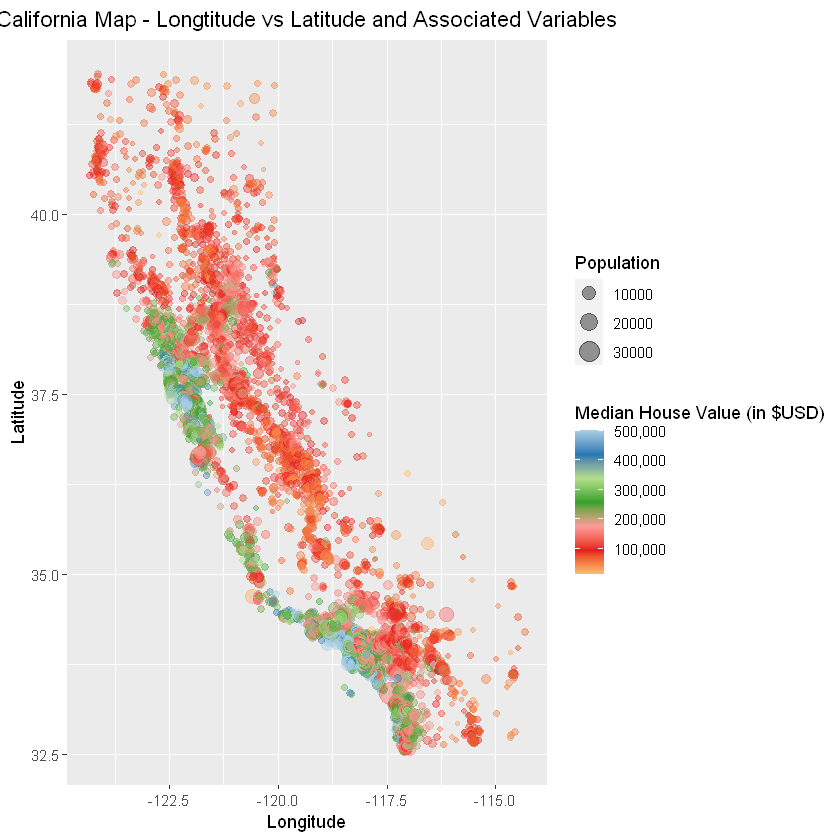

In [15]:
ca_map = ggplot(house, 
                  aes(x = longitude, y = latitude, color = median_house_value, 
                      hma = housing_median_age, tr = total_rooms, tb = total_bedrooms,
                      hh = households, mi = median_income)) +
              geom_point(aes(size = population), alpha = 0.4) +
              xlab("Longitude") +
              ylab("Latitude") +
              ggtitle("California Map - Longtitude vs Latitude and Associated Variables") +
              theme(plot.title = element_text(hjust = 0.5)) +
              scale_color_distiller(palette = "Paired", labels = comma) +
              labs(color = "Median House Value (in $USD)", size = "Population")
ca_map

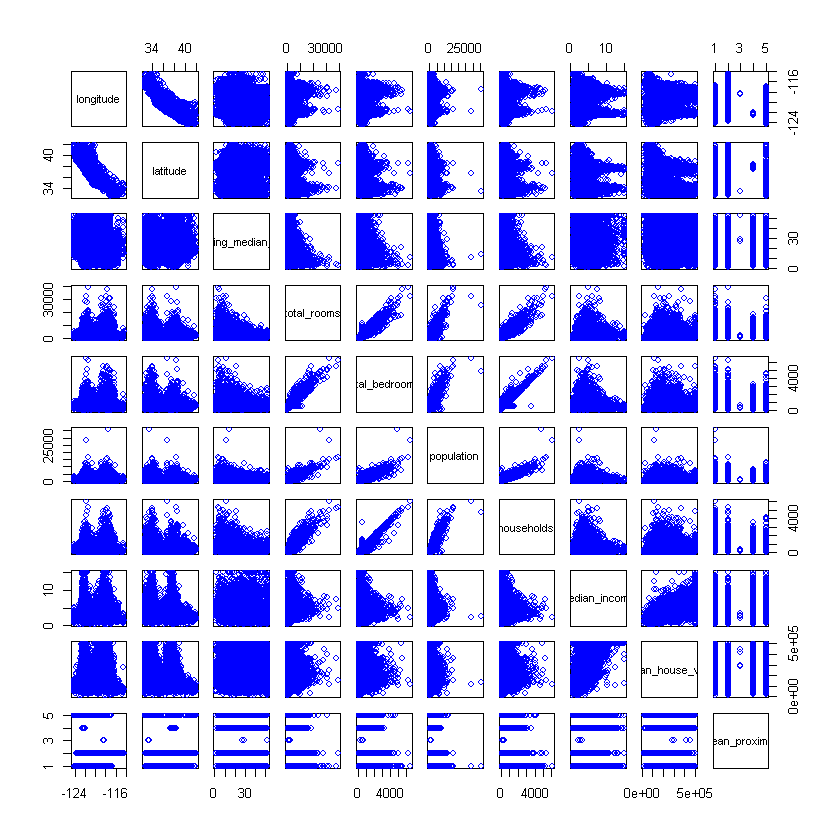

In [16]:
pairs(house, col = "blue")

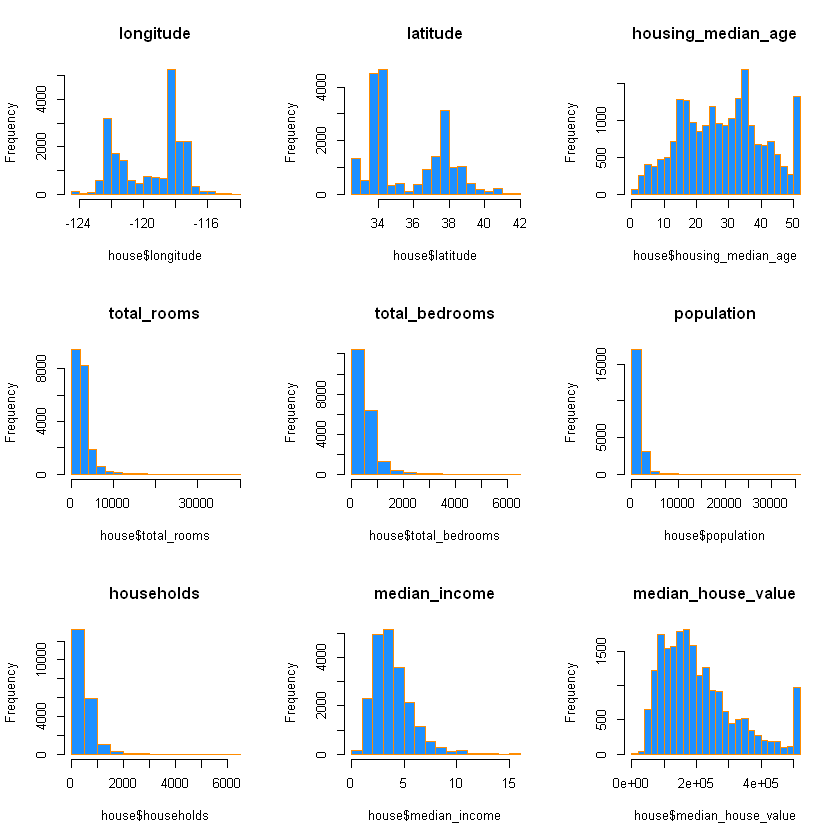

In [17]:
par(mfrow = c(3, 3))
hist(house$longitude, breaks = 20, main = "longitude", border="darkorange", col="dodgerblue")
hist(house$latitude, breaks = 20, main = "latitude", border="darkorange", col="dodgerblue")
hist(house$housing_median_age, breaks = 20, main = "housing_median_age", border="darkorange", col="dodgerblue")
hist(house$total_rooms, breaks = 20, main = "total_rooms", border="darkorange", col="dodgerblue")
hist(house$total_bedrooms, breaks = 20, main = "total_bedrooms", border="darkorange", col="dodgerblue")
hist(house$population, breaks = 20, main = "population", border="darkorange", col="dodgerblue")
hist(house$households, breaks = 20, main = "households", border="darkorange", col="dodgerblue")
hist(house$median_income, breaks = 20, main = "median_income", border="darkorange", col="dodgerblue")
hist(house$median_house_value, breaks = 20, main = "median_house_value", border="darkorange", col="dodgerblue")

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.00000000,-0.92466443,-0.10819681,0.04456798,0.069119698,0.099773223,0.05531009,-0.015175865,-0.04596662
latitude,-0.92466443,1.00000000,0.01117267,-0.03609960,-0.066483906,-0.108784747,-0.07103543,-0.079809127,-0.14416028
housing_median_age,-0.10819681,0.01117267,1.00000000,-0.36126220,-0.319026332,-0.296244240,-0.30291601,-0.119033990,0.10562341
total_rooms,0.04456798,-0.03609960,-0.36126220,1.00000000,0.927058197,0.857125973,0.91848449,0.198049645,0.13415311
total_bedrooms,0.06911970,-0.06648391,-0.31902633,0.92705820,1.000000000,0.873534861,0.97436629,-0.007616874,0.04945686
population,0.09977322,-0.10878475,-0.29624424,0.85712597,0.873534861,1.000000000,0.90722227,0.004834346,-0.02464968
households,0.05531009,-0.07103543,-0.30291601,0.91848449,0.974366294,0.907222266,1.00000000,0.013033052,0.06584265
median_income,-0.01517587,-0.07980913,-0.11903399,0.19804965,-0.007616874,0.004834346,0.01303305,1.000000000,0.68807521
median_house_value,-0.04596662,-0.14416028,0.10562341,0.13415311,0.049456862,-0.024649679,0.06584265,0.688075208,1.00000000


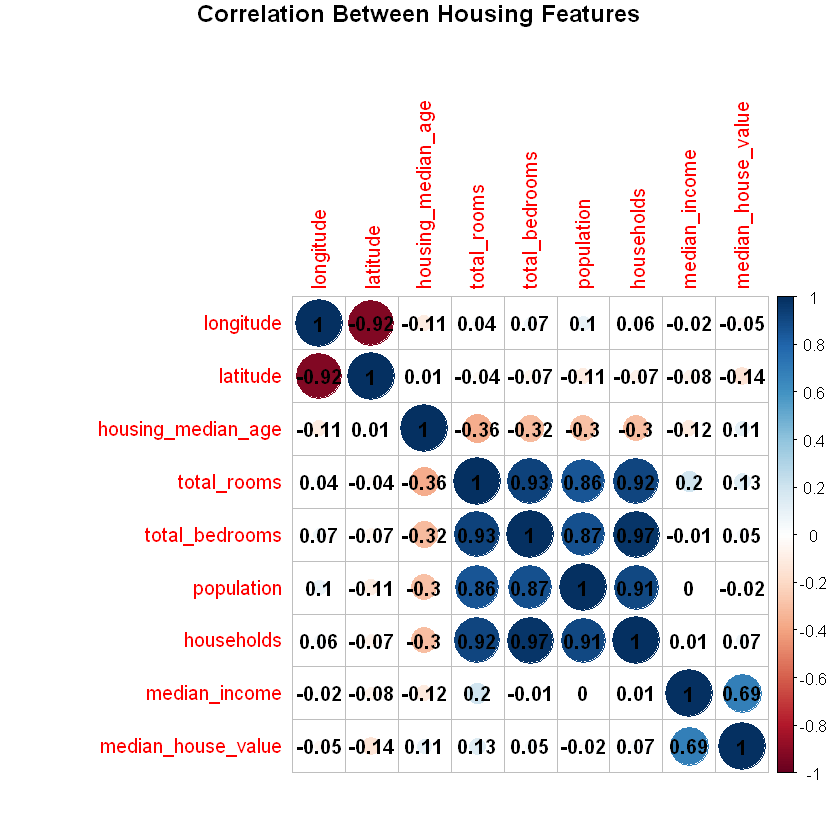

In [18]:
corr=cor(na.omit(house[1:9]))

corr_house=corrplot(corr, title='Correlation Between Housing Features', addCoef.col = "black",
         sig.level = 0.05, insig = "blank",
     mar=c(0,0,1,0))

corr_house